In [15]:
import math
import torch
import hess
import matplotlib.pyplot as plt
from hess.nets import Transformer
from hess.data import data_loader
import numpy as np
import sklearn.datasets as datasets

In [16]:
def twospirals(n_points, noise=.2, random_state=88):
    """
     Returns the two spirals dataset.
    """
    n = np.sqrt(np.random.rand(n_points,1)) * 600 * (2*np.pi)/360
    d1x = -1.5*np.cos(n)*n + np.random.randn(n_points,1) * noise
    d1y =  1.5*np.sin(n)*n + np.random.randn(n_points,1) * noise
    return (np.vstack((np.hstack((d1x,d1y)),np.hstack((-d1x,-d1y)))),
            np.hstack((np.zeros(n_points),np.ones(n_points))))

In [17]:
X, Y = twospirals(500, noise=1.5)

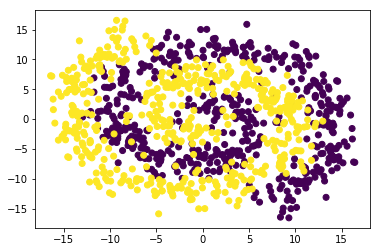

In [18]:
plt.scatter(X[:, 0], X[:, 1], c=Y)

In [19]:
train_x = torch.FloatTensor(X)

In [20]:
train_y = torch.FloatTensor(Y).unsqueeze(-1)

In [21]:
use_cuda = torch.cuda.is_available()
if use_cuda:
    torch.cuda.set_device(4)
    torch.set_default_tensor_type(torch.cuda.FloatTensor)
    train_x, train_y = train_x.cuda(), train_y.cuda()

In [22]:
optimus = Transformer(train_x, train_y, net=hess.nets.MoonNet, n_hidden=5, hidden_size=20,
                     activation=torch.nn.ELU(), bias=True)

In [23]:
print(sum(p.numel() for p in optimus.net.parameters()))

1761


In [24]:
if use_cuda:
    optimus = optimus.cuda()

In [25]:
out = optimus(train_x)

In [26]:
print(out.shape)

torch.Size([1000, 1])


In [27]:
optimus.train_net(print_loss=True, lr=0.01, iters=3000,
                 loss_func=torch.nn.BCELoss())

tensor(0.6953, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.6704, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.6630, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.6518, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.6485, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.6462, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.6397, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.6353, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.6304, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.6281, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.6232, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.6150, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.6092, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.6051, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.5974, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.5962, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.5909, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.5893, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.5819, grad_fn=<BinaryCrossEntropyBack

tensor(0.2207, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.2386, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.2263, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.2213, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.2292, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.2210, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.2235, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.2238, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.2207, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.2235, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.2197, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.2215, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.2197, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.2192, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.2202, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.2172, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.2200, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.2176, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.2176, grad_fn=<BinaryCrossEntropyBack

tensor(0.2145, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.2081, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.2130, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.2074, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.2112, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.2071, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.2099, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.2063, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.2088, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.2059, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.2078, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.2054, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.2069, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.2051, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.2061, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.2046, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.2057, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.2039, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.2052, grad_fn=<BinaryCrossEntropyBack

tensor(0.1900, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.1898, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.1896, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.1895, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.1893, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.1891, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.1889, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.1888, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.1886, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.1884, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.1882, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.1880, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.1878, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.1877, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.1875, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.1873, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.1871, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.1869, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.1867, grad_fn=<BinaryCrossEntropyBack

tensor(0.2316, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.2233, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.2407, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.2079, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.2056, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.2230, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.1967, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.2044, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.2065, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.2019, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.2028, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.2001, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.1981, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.1958, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.1967, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.1960, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.1936, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.1966, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.1956, grad_fn=<BinaryCrossEntropyBack

tensor(0.1610, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.1757, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.1770, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.1747, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.1652, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.1641, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.1677, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.1694, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.1794, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.1758, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.1747, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.1678, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.1660, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.1824, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.1753, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.1624, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.1587, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.1718, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.1774, grad_fn=<BinaryCrossEntropyBack

tensor(0.1719, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.1510, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.1594, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.1619, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.1432, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.1675, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.1561, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.1503, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.1593, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.1495, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.1525, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.1467, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.1473, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.1491, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.1456, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.1441, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.1493, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.1437, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.1442, grad_fn=<BinaryCrossEntropyBack

tensor(0.1289, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.1319, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.1358, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.1312, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.1285, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.1260, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.1251, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.1262, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.1308, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.1305, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.1325, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.1287, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.1298, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.1314, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.1331, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.1344, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.1374, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.1291, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.1242, grad_fn=<BinaryCrossEntropyBack

tensor(0.1529, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.1634, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.1419, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.1434, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.1401, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.1294, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.1325, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.1316, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.1243, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.1281, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.1243, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.1222, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.1248, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.1175, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.1241, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.1150, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.1200, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.1159, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.1160, grad_fn=<BinaryCrossEntropyBack

tensor(0.0929, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.0926, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.0925, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.0922, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.0920, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.0915, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.0913, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.0909, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.0907, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.0905, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.0904, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.0903, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.0905, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.0908, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.0922, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.0946, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.1014, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.1046, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.1155, grad_fn=<BinaryCrossEntropyBack

tensor(0.1217, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.1155, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.1161, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.1327, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.1183, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.1421, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.1169, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.1269, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.1168, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.1074, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.1192, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.1123, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.1034, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.1058, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.0985, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.1063, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.0990, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.0950, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.0980, grad_fn=<BinaryCrossEntropyBack

tensor(0.0831, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.0839, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.0869, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.0801, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.0753, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.0730, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.0723, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.0726, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.0731, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.0751, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.0773, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.0832, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.0798, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.0803, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.0798, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.0822, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.0846, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.0945, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.1030, grad_fn=<BinaryCrossEntropyBack

tensor(0.1322, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.1552, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.1334, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.1414, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.1042, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.1382, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.1151, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.1125, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.1160, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.0947, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.1018, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.0975, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.0964, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.0972, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.0923, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.0833, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.0923, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.0817, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.0819, grad_fn=<BinaryCrossEntropyBack

tensor(0.0730, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.0718, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.0718, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.0713, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.0707, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.0705, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.0702, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.0700, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.0693, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.0689, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.0689, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.0683, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.0681, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.0678, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.0672, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.0672, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.0669, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.0665, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.0663, grad_fn=<BinaryCrossEntropyBack

tensor(0.0618, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.0778, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.0701, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.0692, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.0564, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.0532, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.0558, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.0628, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.0785, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.0848, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.0874, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.1006, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.0795, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.0622, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.0668, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.0699, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.0677, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.0638, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.0627, grad_fn=<BinaryCrossEntropyBack

tensor(0.0709, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.0800, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.1141, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.1269, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.1227, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.1105, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.1053, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.1019, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.0821, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.0962, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.0741, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.0905, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.0829, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.0805, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.0827, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.0745, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.0795, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.0642, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.0718, grad_fn=<BinaryCrossEntropyBack

tensor(0.0552, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.0549, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.0547, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.0543, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.0542, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.0539, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.0536, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.0534, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.0532, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.0530, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.0527, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.0525, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.0523, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.0521, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.0519, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.0517, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.0515, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.0513, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.0511, grad_fn=<BinaryCrossEntropyBack

tensor(0.0409, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.0408, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.0406, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.0406, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.0404, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.0403, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.0402, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.0401, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.0400, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.0399, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.0398, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.0397, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.0396, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.0395, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.0394, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.0393, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.0392, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.0391, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.0390, grad_fn=<BinaryCrossEntropyBack

tensor(0.0405, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.0404, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.0403, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.0401, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.0400, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.0399, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.0397, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.0396, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.0395, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.0394, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.0392, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.0391, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.0390, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.0389, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.0388, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.0389, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.0400, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.0432, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.0666, grad_fn=<BinaryCrossEntropyBack

In [28]:
out = optimus(train_x)

In [29]:
out.shape

torch.Size([1000, 1])

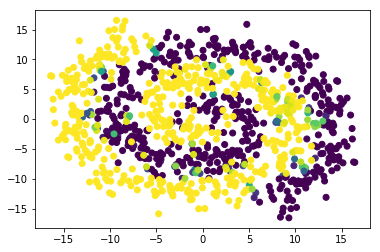

In [30]:
plt.scatter(train_x[:, 0].cpu(), train_x[:, 1].cpu(), c=out[:, 0].detach().cpu())

## Get out the Hessian

In [31]:
import hess.utils as utils

In [32]:
model = optimus.net
par_list = model.parameters()
n_par_w_bias = sum(torch.numel(p) for p in par_list)

In [33]:
n_par_w_bias

1761

In [34]:
e1 = torch.zeros(n_par_w_bias)
e1[0] = 1
e1 = e1.unsqueeze(0)

In [35]:
magic_e1 = utils.unflatten_like(e1, model.parameters())
if use_cuda:
    magic_e1 = [t.cuda() for t in magic_e1]

In [36]:
utils.eval_hess_vec_prod(magic_e1, model.parameters(), 
                         net=optimus.net,
                         criterion=torch.nn.MSELoss(), 
                         inputs=train_x, targets=train_y)

In [37]:
output = utils.gradtensor_to_tensor(optimus.net, include_bn=True)

In [38]:
output.nelement()

1761

In [39]:
base_vec = torch.zeros(n_par_w_bias).cpu().unsqueeze(0)
base_vec[0, 0] = 1.

base_vec = utils.unflatten_like(base_vec, model.parameters())
utils.eval_hess_vec_prod(base_vec, model.parameters(),
                        net=optimus.net.cpu(),
                        criterion=torch.nn.MSELoss(),
                        inputs=train_x.cpu(), targets=train_y.cpu())
output = utils.gradtensor_to_tensor(optimus.net.cpu(), include_bn=True)

n_par = output.nelement()

In [40]:
hessian = torch.zeros(n_par, n_par).cpu()
for pp in range(n_par):
    base_vec = torch.zeros(n_par_w_bias).cpu().unsqueeze(0)
    base_vec[0, pp] = 1.
    
    base_vec = utils.unflatten_like(base_vec, model.parameters())
    utils.eval_hess_vec_prod(base_vec, model.parameters(),
                            net=optimus.net.cpu(),
                            criterion=torch.nn.MSELoss(),
                            inputs=train_x.cpu(), targets=train_y.cpu())
    if pp == 0:
        output = utils.gradtensor_to_tensor(optimus.net, include_bn=True)
        hessian = torch.zeros(output.nelement(), output.nelement())
        hessian[:, pp] = output
    hessian[:, pp] = utils.gradtensor_to_tensor(optimus.net.cpu(), include_bn=True).cpu()

In [41]:
torch.cuda.empty_cache()

In [42]:
e_val, e_vec = np.linalg.eig(hessian.cpu())
idx = np.abs(e_val).argsort()[::-1]   
e_val = torch.FloatTensor(e_val[idx].real)
e_vec = torch.FloatTensor(e_vec[:,idx].real)

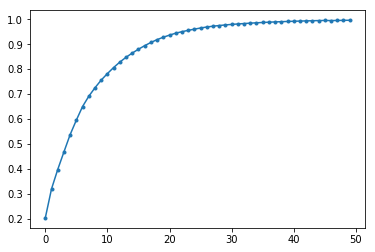

In [43]:
ne = e_val.div(torch.sum(e_val))
plt.plot(np.cumsum(ne[:50].cpu()), marker=".")

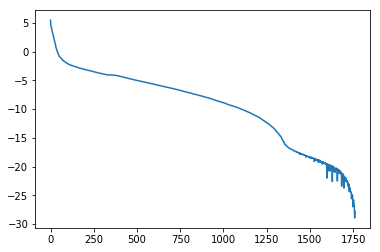

In [44]:
plt.plot(np.log(np.abs(e_val)))

## Save model to use on laptop

In [45]:
torch.save(optimus.net.state_dict(), "../hess/saved-models/spirals.pt")
saved_pars = optimus.net.state_dict()

In [46]:
torch.save(hessian, "../hess/saved-models/spirals_hessian.pt")

In [47]:
torch.set_default_tensor_type(torch.FloatTensor)
optimus = optimus.cpu();

## First Plot the Found Classifier

In [48]:
buffer = 0.5
h = 0.1
x_min, x_max = train_x[:, 0].min() - buffer, train_x[:, 0].max() + buffer
y_min, y_max = train_x[:, 1].min() - buffer, train_x[:, 1].max() + buffer

xx,yy=np.meshgrid(np.arange(x_min.cpu(), x_max.cpu(), h), 
                  np.arange(y_min.cpu(), y_max.cpu(), h))
in_grid = torch.FloatTensor([xx.ravel(), yy.ravel()]).t()

In [49]:
preds = optimus(in_grid).squeeze().cpu()

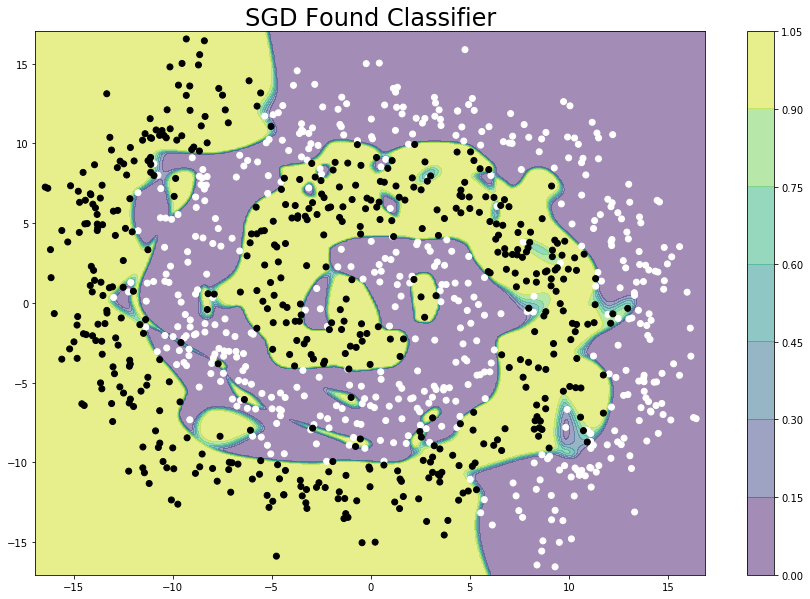

In [50]:
plt.figure(figsize=(15, 10))
plt.contourf(xx, yy, preds.detach().numpy().reshape(xx.shape), alpha=0.5)
plt.title("SGD Found Classifier", fontsize=24)
plt.colorbar()
plt.scatter(train_x[:, 0].cpu(), train_x[:, 1].cpu(), c=train_y[:, 0].cpu(), cmap=plt.cm.binary)

## How Should We Sample Perturbations

In [51]:
n_val = e_val.nelement()
n_val = 10
basis = e_vec[:, -n_val:]

In [52]:
optimus.net.load_state_dict(saved_pars)

<All keys matched successfully>

In [70]:
sig = 0.001/e_val[-n_val:].abs().pow(0.5)
wghts = torch.normal(torch.zeros(n_val), sig)

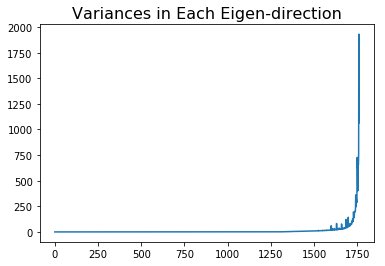

In [79]:
plt.plot(sig)
plt.title("Variances in Each Eigen-direction", fontsize=16);

In [71]:
perturb = basis.matmul(wghts.unsqueeze(-1)).t()

In [72]:
perturb = utils.unflatten_like(perturb, optimus.net.parameters())
for i, par in enumerate(optimus.net.parameters()):
    par.data = par.data + perturb[i]

In [73]:
buffer = 0.5
h = 0.1
x_min, x_max = train_x[:, 0].min() - buffer, train_x[:, 0].max() + buffer
y_min, y_max = train_x[:, 1].min() - buffer, train_x[:, 1].max() + buffer

xx,yy=np.meshgrid(np.arange(x_min.cpu(), x_max.cpu(), h), 
                  np.arange(y_min.cpu(), y_max.cpu(), h))
in_grid = torch.FloatTensor([xx.ravel(), yy.ravel()]).t()

In [74]:
preds = optimus(in_grid).squeeze().cpu()

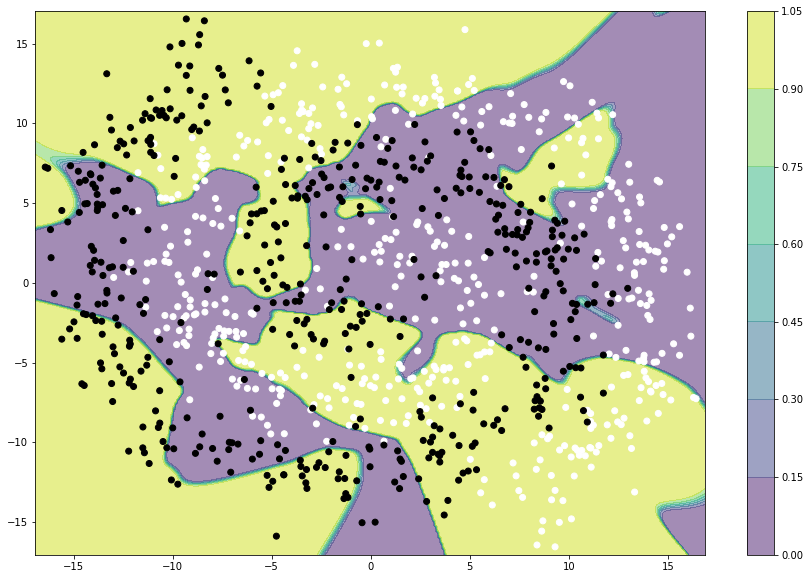

In [75]:
plt.figure(figsize=(15, 10))
plt.contourf(xx, yy, preds.detach().numpy().reshape(xx.shape), alpha=0.5)
# plt.title("Temp Scaled", fontsize=24)
plt.colorbar()
plt.scatter(train_x[:, 0].cpu(), train_x[:, 1].cpu(), c=train_y[:, 0].cpu(), cmap=plt.cm.binary)

## Let's Try Averaging

In [59]:
buffer = 0.5
h = 0.1
x_min, x_max = train_x[:, 0].min() - buffer, train_x[:, 0].max() + buffer
y_min, y_max = train_x[:, 1].min() - buffer, train_x[:, 1].max() + buffer

xx,yy=np.meshgrid(np.arange(x_min.cpu(), x_max.cpu(), h), 
                  np.arange(y_min.cpu(), y_max.cpu(), h))
in_grid = torch.FloatTensor([xx.ravel(), yy.ravel()]).t()

In [68]:
n_val = e_val.nelement()
basis = e_vec[:, :n_val]
sig = 0.001/e_val[:n_val].abs().pow(0.5)

n_trial = 100
pred = torch.zeros(in_grid.size(0), n_trial).cpu()
for tt in range(n_trial):
    optimus.net.load_state_dict(saved_pars)
    wghts = torch.normal(torch.zeros(n_val), sig)
    perturb = basis.matmul(wghts.unsqueeze(-1)).t()
#     perturb = perturb.div(perturb.norm()).mul(scale)

    perturb = utils.unflatten_like(perturb, optimus.net.parameters())
    for i, par in enumerate(optimus.net.parameters()):
        par.data = par.data + perturb[i]
        
    pred[:, tt] = optimus(in_grid).squeeze().cpu()

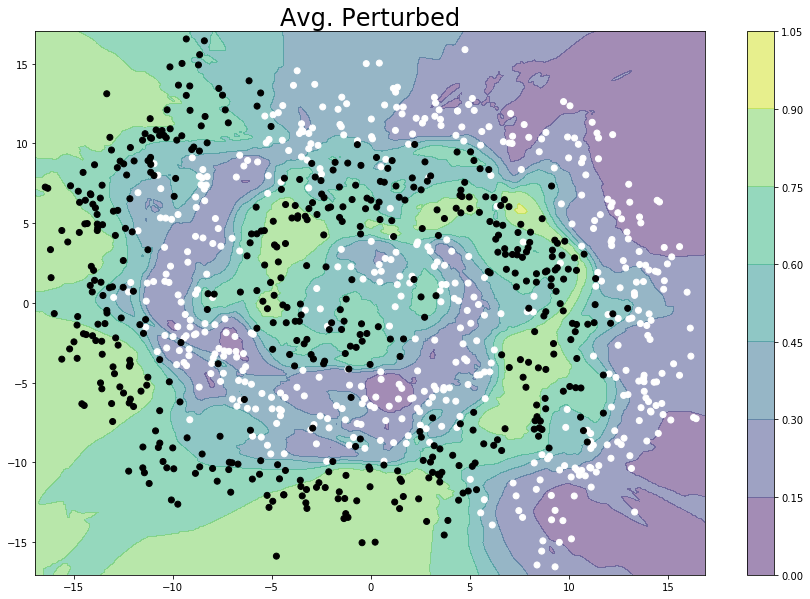

In [69]:
avg_pred = pred.mean(1).detach().numpy().reshape(xx.shape)
plt.figure(figsize=(15, 10))
plt.contourf(xx, yy, avg_pred, alpha=0.5)
plt.title("Avg. Perturbed", fontsize=24)
plt.colorbar()
plt.scatter(train_x[:, 0].cpu(), train_x[:, 1].cpu(), c=train_y[:, 0].cpu(), cmap=plt.cm.binary)